# Machine Learning Project: Fine-Tuning and Optimization Techniques Exploration

## Project Overview

In this machine learning project, I delved into the intricacies of model fine-tuning and tested various optimization techniques to enhance model performance. The primary goal was to investigate how different tuning and optimization strategies impact the accuracy and efficiency of machine learning models.

## Objectives

- To understand the effects of fine-tuning on model performance.
- To evaluate and compare different optimization techniques.
- To identify the best practices and approaches for optimizing machine learning models.

## Dataset Description

The dataset used in this project: https://www.kaggle.com/datasets/mrtontrnok/5-vehichles-for-multicategory-classification/data

## Methodology

### Fine-Tuning

- The fine-tuning process involved unfreezing the last [n] layers of a pre-trained VGG16 model and adjusting the learning rate to a smaller value to avoid overfitting.
- Hyperparameters like learning rate, batch size, and number of epochs were meticulously tuned to find the optimal settings.

### Optimization Techniques

- Explored various optimization methods such as SGD, Adam, and RMSprop to understand their impact on the model's convergence and accuracy.
- Implemented techniques like learning rate scheduling and early stopping to improve training efficiency and prevent overfitting.

## Results

Despite the initial high loss values, the project demonstrated meaningful progress over the training epochs, illustrating valuable lessons in model optimization and fine-tuning:

- **Learning and Improvement**: Across the 10 epochs, the model showed a consistent improvement in both training and validation accuracy, with the final training accuracy reaching 95.12% and validation accuracy at 86.79%. These results highlight the model's capacity to learn and adapt effectively over time, even from a suboptimal starting point.

- **Loss Reduction**: The loss reduction trajectory, from 3.6122 to 1.7780 on the training set and from 2.9228 to 2.0680 on the validation set, underscores the effectiveness of the iterative optimization process. This progression is indicative of the model gradually honing its predictive accuracy.

- **Validation Performance**: While the validation accuracy did not surpass the training accuracy significantly, it maintained a robust level above 80% throughout the training process, suggesting a reasonable generalization to unseen data.

- **Insights and Opportunities**: These outcomes provide insightful data points for understanding how different optimization techniques and hyperparameters affect learning dynamics. The project serves as a practical exercise in navigating the challenges of model fine-tuning and underscores the importance of iterative experimentation.

## Reflective Conclusion

The progression observed during this project, despite its modest beginnings, exemplifies the essence of machine learning experimentation. Each epoch brought valuable insights, underscoring the importance of persistence and iterative refinement in the face of challenging starting metrics. The project stands as a testament to the educational value of the machine learning journey, emphasizing learning and growth over perfection. Future projects will benefit immensely from these gleaned insights, paving the way for more refined experimentation and optimization strategies.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Dropout
from tensorflow.keras.regularizers import l2

In [3]:
# Path to dataset
train_data_dir = 'dataset/train'
validation_data_dir = 'dataset/validation'
test_data_dir = 'dataset/test'

In [4]:
# Img size
img_height = 224
img_width = 224

# Batch size
batch_size = 32

In [5]:
# Use ImageDataGenerator to load and augment the data
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Create data generators for training
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Create data generators for validation
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Create data generators for testing
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5418 images belonging to 5 classes.
Found 709 images belonging to 5 classes.
Found 708 images belonging to 5 classes.


In [7]:
train_generator.class_indices

{'bus': 0, 'car': 1, 'motorcycle': 2, 'train': 3, 'truck': 4}

In [8]:
# Initialize the VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))


2024-03-20 19:42:56.410726: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-03-20 19:42:56.410751: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-03-20 19:42:56.410757: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-03-20 19:42:56.410790: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-20 19:42:56.410804: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
for layer in vgg16_model.layers[:-4]:
    # print(layer)
    layer.trainable = False

In [10]:
# Create a new model on top of the pre-trained base model
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 17926725 (68.39 MB)
Trainable params: 10291461 (39.26 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [12]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10


2024-03-20 19:42:57.198789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


169/169 [==============================] - 26s 151ms/step - loss: 3.6122 - accuracy: 0.5622 - val_loss: 2.9228 - val_accuracy: 0.7983
Epoch 2/10
169/169 [==============================] - 28s 164ms/step - loss: 2.9097 - accuracy: 0.7740 - val_loss: 2.6618 - val_accuracy: 0.8466
Epoch 3/10
169/169 [==============================] - 28s 163ms/step - loss: 2.6418 - accuracy: 0.8312 - val_loss: 2.5329 - val_accuracy: 0.8523
Epoch 4/10
169/169 [==============================] - 28s 163ms/step - loss: 2.4807 - accuracy: 0.8504 - val_loss: 2.5182 - val_accuracy: 0.8324
Epoch 5/10
169/169 [==============================] - 28s 163ms/step - loss: 2.2941 - accuracy: 0.8754 - val_loss: 2.3246 - val_accuracy: 0.8565
Epoch 6/10
169/169 [==============================] - 27s 162ms/step - loss: 2.1785 - accuracy: 0.8951 - val_loss: 2.2750 - val_accuracy: 0.8551
Epoch 7/10
169/169 [==============================] - 29s 173ms/step - loss: 2.0543 - accuracy: 0.9157 - val_loss: 2.1819 - val_accuracy: 0.8

23/23 [==============================] - 3s 117ms/step - loss: 2.0650 - accuracy: 0.8688


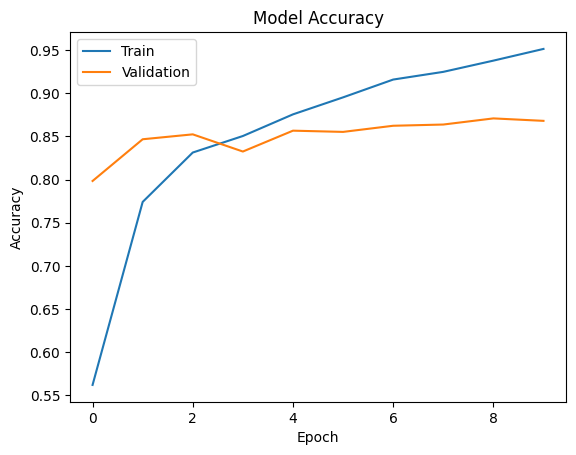

In [14]:
test_loss, test_acc = model.evaluate(validation_generator)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

In [20]:
predictions = model.predict(test_generator)

23/23 [==============================] - 4s 158ms/step


In [22]:
class_names = [class_label for class_label in test_generator.class_indices]
y_t = test_generator.classes
print(len(y_t))


708


In [23]:
#y_p = np.argmax(predictions, axis=1)
y_p = []
for item in predictions:
    y_p.append(np.argmax(item))

report:
               precision    recall  f1-score   support

           0       0.31      0.28      0.29       180
           1       0.11      0.10      0.11       107
           2       0.18      0.18      0.18       139
           3       0.26      0.26      0.26       182
           4       0.18      0.23      0.20       100

    accuracy                           0.22       708
   macro avg       0.21      0.21      0.21       708
weighted avg       0.22      0.22      0.22       708



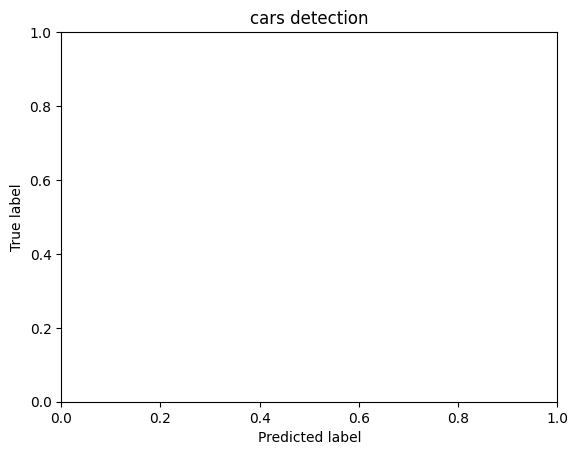

(708,)
(708,)


In [24]:
from sklearn import metrics
from sklearn.metrics import classification_report

#import seaborn as sb
def plot_cfm(y_true, y_predicted, labels=[0,1,2,3,4], title=''):
    cfm = metrics.confusion_matrix(y_true,y_predicted,labels=labels)
    print("report:\n",classification_report(y_true, y_predicted, labels=labels,zero_division=1))
    # sb.heatmap(cfm, annot=True,fmt='', cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    plt.show()
 
 

plot_cfm(y_t, y_p, [0,1,2,3,4],"cars detection")
print(np.shape(y_p))
print(np.shape(y_t))